## TP4
#### Ieva Petrulionyte and Sidorets Kirill

We want to predict the IBD (Inflammatory Bowel Disease) clinical status of patients **given the abundance of microbial species** living in their gut.

In [20]:
# Import libraries.
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [21]:
# Load and visualize the data.
ab_data_pd = pd.read_csv("gut_abundances.tsv", sep="\t", header = 0)
descriptor_names = ab_data_pd.columns
ab_data = ab_data_pd.to_numpy()
status_txt =  pd.read_csv("ibd_status.lst", sep="\t", header = None).to_numpy()
ab_data_pd

,k__Bacteria,k__Archaea,k__Viruses,k__Bacteria|p__Bacteroidetes,k__Bacteria|p__Firmicutes,k__Bacteria|p__Proteobacteria,k__Bacteria|p__Actinobacteria,k__Archaea|p__Euryarchaeota,k__Bacteria|p__Verrucomicrobia,k__Viruses|p__Viruses_noname,...,k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhodobacterales|f__Rhodobacteraceae,k__Viroids|p__Viroids_noname|c__Viroids_noname|o__Viroids_noname|f__Pospiviroidae|g__Pospiviroidae_noname,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Microbacteriaceae|g__Leifsonia,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Chromatiales|f__Ectothiorhodospiraceae|g__Thioalkalivibrio,k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhodobacterales|f__Rhodobacteraceae|g__Labrenzia,k__Viroids|p__Viroids_noname|c__Viroids_noname|o__Viroids_noname|f__Pospiviroidae|g__Pospiviroidae_noname|s__Dahlia_latent_viroid,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Microbacteriaceae|g__Leifsonia|s__Leifsonia_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Chromatiales|f__Ectothiorhodospiraceae|g__Thioalkalivibrio|s__Thioalkalivibrio_unclassified,k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhodobacterales|f__Rhodobacteraceae|g__Labrenzia|s__Labrenzia_unclassified,k__Viroids|p__Viroids_noname|c__Viroids_noname|o__Viroids_noname|f__Pospiviroidae|g__Pospiviroidae_noname|s__Dahlia_latent_viroid|t__PRJNA186953
MH0001,99.85542,0.12024,0.02435,75.76233,22.45185,0.79821,0.77138,0.12024,0.04902,0.02435,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
MH0002,99.84094,0.00000,0.15906,29.66601,63.00964,0.80546,1.31857,0.00000,5.02320,0.15906,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
MH0003,99.99769,0.00000,0.00231,28.89089,68.87499,1.10182,1.11216,0.00000,0.00000,0.00231,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
MH0004,99.54958,0.44427,0.00615,36.82369,59.90264,0.96707,1.79713,0.44427,0.00000,0.00615,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
MH0005,99.85338,0.02338,0.12324,53.45066,44.00230,0.66402,1.34265,0.02338,0.33886,0.12324,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V1_UC61_0,100.00000,0.00000,0.00000,73.60036,23.13241,1.97125,1.29598,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
V1_UC62_0,99.43677,0.53534,0.02789,59.81443,31.16507,1.25950,7.12218,0.53534,0.07560,0.02789,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
V1_UC7_0,99.97056,0.00000,0.02944,61.47615,31.97288,3.65580,1.59657,0.00000,1.25953,0.02944,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
V1_UC8_0,96.71485,3.21396,0.01313,26.64142,56.61496,0.68027,7.95935,3.21396,4.79898,0.01313,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


Take a look at the data: number of samples ($n$), number of descriptors ($p$), names of descriptors (in ```descriptor_names```), etc.

In [22]:
n,p = ab_data_pd.shape
print("Number of samples, number of descriptors:",n,p)
descriptor_names

Number of samples, number of descriptors: 396 1939


Index(['k__Bacteria', 'k__Archaea', 'k__Viruses',
       'k__Bacteria|p__Bacteroidetes', 'k__Bacteria|p__Firmicutes',
       'k__Bacteria|p__Proteobacteria', 'k__Bacteria|p__Actinobacteria',
       'k__Archaea|p__Euryarchaeota', 'k__Bacteria|p__Verrucomicrobia',
       'k__Viruses|p__Viruses_noname',
       ...
       'k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhodobacterales|f__Rhodobacteraceae',
       'k__Viroids|p__Viroids_noname|c__Viroids_noname|o__Viroids_noname|f__Pospiviroidae|g__Pospiviroidae_noname',
       'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Microbacteriaceae|g__Leifsonia',
       'k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Chromatiales|f__Ectothiorhodospiraceae|g__Thioalkalivibrio',
       'k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhodobacterales|f__Rhodobacteraceae|g__Labrenzia',
       'k__Viroids|p__Viroids_noname|c__Viroids_noname|o__Viroids_noname|f__Pospiviroidae|g__Pospiviroidae_noname|s__D

We now transform the target variable to a binary (0 ==  control, 1 == IBD) variable ```status```:

In [23]:
status = np.ravel([int(s == "IBD") for s in status_txt])

What is the name of the most correlated species (we denote by S) to the clinical status? Use the ```np.corrcoef``` function to compute the correlation between the data and the status.
You can compute the correlation between the data and the status using ```corr_vector = np.corrcoef(ab_data.transpose(),status))[:-1,p]```, which gives the correlation for each species.

In [24]:
# Compute the correlation vector for each descriptor and select the one that correlates the most with IBD.
corr_vector = np.corrcoef(ab_data.transpose(),status)[:-1,p]
print("Coefficient that correlates the most with IBD:", corr_vector.max(), ", with index :", corr_vector.argmax(), ", corresponding bacteria:", descriptor_names[corr_vector.argmax()])

Coefficient that correlates the most with IBD: 0.40722498985588496 , with index : 6 , corresponding bacteria: k__Bacteria|p__Actinobacteria


Create a (naïve) predictor that takes as input the abundance of S and output the clinical status of the patient. Either compute the prediction accuracy or its AUC ROC for every threshold, this will be our baseline predictor to improve on.

(198, 1939)
(396, 1939)
6


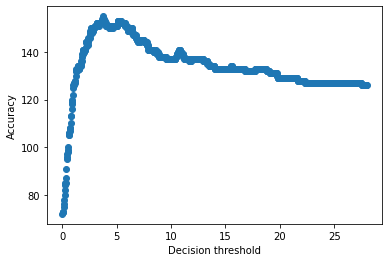

AUC ROC on test set: 0.6828084555651424
Accuracy on test: 0.7222222222222222


In [25]:
# Split data into 50% train and 50% test subsets.
x_train, x_test, y_train, y_test = train_test_split(
    ab_data, status, test_size=0.5, shuffle=True
)
print(x_train.shape)
print(ab_data.shape)

# Remove species not abundant in the train set.
col_to_rm = np.where(np.sum(x_train,axis=0) == 0)
x_train = np.delete(x_train,col_to_rm,axis=1)
x_test =  np.delete(x_test,col_to_rm,axis=1)
n,p = x_train.shape

# Index of the best correlated species to IBD.
best_cor_sp = corr_vector.argmax()
print(best_cor_sp)

# Compute accuracy for a naive predictor only using the best correlated species.
accuracy = list()
ths = np.linspace(0,int(np.max(x_train[:,best_cor_sp]))+1,1000) # threshold list
for t in ths:
    predictions = (x_train[:,best_cor_sp]>t)
    accuracy += [sum(predictions == y_train)]

# Plot the decision threshold vs. performance of the predictor.
plt.scatter(ths,accuracy)
plt.xlabel("Decision threshold")
plt.ylabel("Accuracy")
plt.show()

# Decision threshold corresponding to the best accuracy.
best_ths = ths[np.array(accuracy).argmax()]
# Report the accuracy on the test set.
predictions = (x_test[:,best_cor_sp]>best_ths)
accuracy = sum(predictions == y_test)/len(y_test)
roc = roc_auc_score(y_test==1,predictions)
print("AUC ROC on test set:",roc)
print("Accuracy on test:",accuracy)


Now we hope that we can do better when using more than 1 descriptor.

We will first use a standard [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Use the [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html ) function of Sklearn to evaluate your predictor in a cross-validation way.

Take a look at what metrics you can find in the attributes of the cross-validation object `cv` and print the average accuracy.

Do you gain in terms of accuracy compared to a single predictor? Check if you are overfitting the data.

In [26]:
# Declaring log-regression with no regularization.
logreg = linear_model.LogisticRegression(penalty='none', max_iter=100000)
cv = cross_validate(logreg, ab_data_pd, status)

test_score = np.array(cv["test_score"]).mean()
# Print mean accuracy on the test set.
print("Average Cross-Validation accuracy on test:",test_score)
# Print example accuracy on 1 fold.
print("Cross-Validation accuracy on test of the first fold:",cv["test_score"][0])


Average Cross-Validation accuracy on test: 0.7626898734177214
Cross-Validation accuracy on test of the first fold: 0.7375


Check the `coef_` attribute of your model. How many species are you using for taking the decision?

In [27]:
logreg.fit(x_train,y_train)
used_descriptors = logreg.coef_
print("The model uses",len(used_descriptors[0]),"descriptors to calculate the prediction with coefficients:")
print(used_descriptors)

The model uses 1671 descriptors to calculate the prediction with coefficients:
[[ 3.33431933e+00  2.04741825e+00 -2.22066893e+00 ... -5.37569856e-04
  -5.37569856e-04 -5.37569856e-04]]


Considering that only few bacterial species may be responsible for IBD, choose a relevant regularization (see the available penalties for logistic regression [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)).



In [28]:
# Split data into 50% train and 50% test subsets
x_train, x_test, y_train, y_test = train_test_split(
    ab_data, status, test_size=0.5, shuffle=True
)

# Create a regularized model with L1 regularization
logreg_regul1 =linear_model.LogisticRegression(solver="liblinear", penalty="l1", max_iter=100000)
logreg_regul1.fit(x_train,y_train)
pred1 = logreg_regul1.predict(x_test)
# Report accuracy on test set
accuracy1 = sum(pred1 == y_test)/len(y_test)
roc1 = roc_auc_score(y_test==1,pred1)
print("AUC ROC on test set with L1 penalty: ",roc1,", accuracy: ", accuracy1)

# Create a regularized model with L2 regularization
logreg_regul2 =linear_model.LogisticRegression(solver="liblinear", penalty="l2", max_iter=100000)
logreg_regul2.fit(x_train,y_train)
pred2 = logreg_regul2.predict(x_test)
# Report accuracy on test set
accuracy2 = sum(pred2 == y_test)/len(y_test)
roc2 = roc_auc_score(y_test==1,pred2)
print("AUC ROC on test set with L2 penalty: ",roc2,", accuracy: ", accuracy2)

AUC ROC on test set with L1 penalty:  0.7609208972845337 , accuracy:  0.7828282828282829
AUC ROC on test set with L2 penalty:  0.7804014167650533 , accuracy:  0.797979797979798


Have you increased the accuracy? Looking at `logreg_regul.coef_`, how many descriptors are you using after regularization?
All things considered, is it a better model?

In [29]:
used_descriptors1 = np.array(logreg_regul1.coef_[0])
print("The model with L1 penalty uses: ", np.count_nonzero(used_descriptors1),"descriptors")

used_descriptors2 = np.array(logreg_regul2.coef_[0])
print("The model with L2 penalty uses: ", np.count_nonzero(used_descriptors2),"descriptors")

print("Total number of descriptors: ", used_descriptors1.size)

The model with L1 penalty uses:  99 descriptors
The model with L2 penalty uses:  1721 descriptors
Total number of descriptors:  1939


We use fewer descriptors than the model without regularization, we also notice that on average L1 regularization results in a model with a slightly better accuracy. Therefore we use this model in the cells below.

Find the optimal regularization strength, by comparing performances on test set and train set. If you have more time, best is to do it by plotting the mean performance in cross-validation, with confidence enveloppe (+/- std deviation) over the folds.


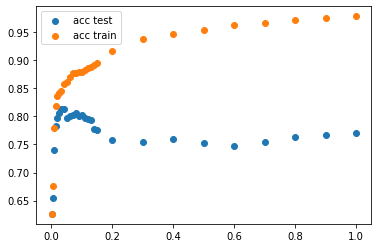

In [57]:
acc_test = list()
acc_train = list()

# Fit log-regression models with different penalty strength and plot the accuracy for train and test batches.
reg_strengths = [0.001,0.005,0.01,0.015,0.02,0.025,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for c in reg_strengths:
    logreg = linear_model.LogisticRegression(solver="liblinear", penalty="l1", C=c)
    cv = cross_validate(logreg, ab_data_pd, status, return_train_score=True)
    test_score = np.array(cv["test_score"]).mean()
    train_score = np.array(cv["train_score"]).mean()
    acc_test.append(test_score)
    acc_train.append(train_score)
    
plt.clf()
plt.scatter(reg_strengths, acc_test, label='acc test')
plt.scatter(reg_strengths, acc_train, label='acc train')
plt.legend()
plt.show()

Train a classifier on the full dataset with the optimial regularization strength, and interpret the coefficients. You can check in particular if it is consistent with [this paper](https://pubmed.ncbi.nlm.nih.gov/27999802/) and [this one](https://pubmed.ncbi.nlm.nih.gov/20648002/).

In [58]:
# c is the optimal penalty given the previously calculated accuracy depending on differentpenalty coeficients.
c = reg_strengths[np.array(acc_test).argmax()]
logreg = linear_model.LogisticRegression(solver="liblinear", penalty="l1", C=c)
logreg.fit(ab_data,status)
weights = logreg.coef_
print(c, acc_test[np.array(acc_test).argmax()])

# Positive associations with IBD used by the model with L1 regularization and optimal penalty weight.
positives = np.where(weights>0)
print("There are", positives[1].size, "positive associations with IBD")
print(np.array(descriptor_names)[positives[1]])

# Negative associations with IBD used by the model with L1 regularization and optimal penalty weight.
negatives = np.where(weights<0)
print("There are", negatives[1].size, "negative associations with IBD")
print(np.array(descriptor_names)[negatives[1]])

0.03 0.8131645569620252
There are 13 positive associations with IBD
['k__Bacteria' 'k__Bacteria|p__Firmicutes' 'k__Bacteria|p__Actinobacteria'
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria'
 'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiaceae'
 'k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Acidaminococcaceae'
 'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Prevotella'
 'k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Lachnospiraceae_noname'
 'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_coprocola'
 'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_stercoris'
 'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_coprocola|t__GCF_000154845'
 'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroi

We use C-Support Vector Classification with L2 penalty and an experimentaly find the optimal penalty strength.

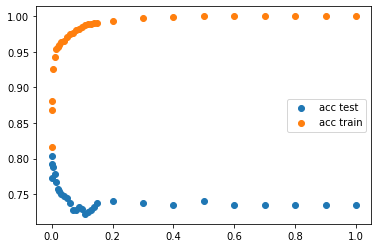

0.0005 0.8030063291139241
There are 849 positive associations with IBD
There are 815 negative associations with IBD


In [59]:
from sklearn.svm import SVC

acc_test = list()
acc_train = list()

# Fit SVM models with different penalty strength and plot the accuracy for train and test batches.
reg_strengths = [0.0001,0.0005,0.001,0.005,0.01,0.015,0.02,0.025,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for c in reg_strengths:
    vector_m = SVC(gamma='auto', C=c, kernel="linear")
    cv = cross_validate(vector_m, ab_data_pd, status, return_train_score=True)
    test_score = np.array(cv["test_score"]).mean()
    train_score = np.array(cv["train_score"]).mean()
    acc_test.append(test_score)
    acc_train.append(train_score)
    
plt.clf()
plt.scatter(reg_strengths, acc_test, label='acc test')
plt.scatter(reg_strengths, acc_train, label='acc train')
plt.legend()
plt.show()

c = reg_strengths[np.array(acc_test).argmax()]
vector_m = SVC(gamma='auto', C=c, kernel="linear")
vector_m.fit(ab_data,status)
weights = vector_m.coef_
print(c, acc_test[np.array(acc_test).argmax()])

# Positive associations with IBD used by the model with L1 regularization and optimal penalty weight.
positives = np.where(weights>0)
print("There are", positives[1].size, "positive associations with IBD")

# Negative associations with IBD used by the model with L1 regularization and optimal penalty weight.
negatives = np.where(weights<0)
print("There are", negatives[1].size, "negative associations with IBD")

We see that in an SVM with L2 regularization a lot more parameters are being used in comparison to log-regression with L1 regularization, the accuracy is slightly lower than the one obtained with the previous model. The SVM model is more accurate with a large regularization strength, which is consistent with the previous more accurate log-regression model that used only 26 coefficients.

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

acc_test = list()
acc_train = list()

tree = DecisionTreeClassifier(random_state=0)
tree.fit(ab_data,status)
cv = cross_val_score(tree, ab_data, status, cv=10)

# Print mean accuracy on the test set.
print("Average Cross-Validation accuracy on test:", cv.mean())
# Print example accuracy on 1 fold.
print("Cross-Validation accuracy on test of the first fold:", cv[0])

Average Cross-Validation accuracy on test: 0.6962820512820513
Cross-Validation accuracy on test of the first fold: 0.7


Using a decision tree to classify IBD data gives a lower accuracy than both the log-regression and SVM models. This could be the case because no reguralization can be applied and the model therefore takes into account all coefficients of which some do not correlate with the target value and therefore add more noise rather than making the prediction of the decision tree more accurate.